# LSTM:

Long Short-Term Memory (LSTM) where designed to address the vanishing gradient issue faced by traditional RNNs in learning from long-term dependencies in sequential data. LSTMs are capable of maintaining information over extended periods because of memory cells and gating mechanisms. These memory cells are managed by three primary gates: the input gate, the forget gate and the output gate.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [4]:
data = pd.read_csv('data/loan prediction.csv')
data.set_index('Loan_ID', inplace=True)
loan_amount = data['LoanAmount'].astype(float).values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(loan_amount)

In [5]:
window_size = 12
X = []
y = []
target_dates = data.index[window_size:]

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i - window_size:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, target_dates, test_size=0.2, shuffle=False
)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [6]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True,
          input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

rmse = np.sqrt(np.mean((y_test - predictions)**2))
print(f'RMSE: {rmse:.2f}')

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: nan - val_loss: nan
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: nan - val_loss: nan
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: nan - val_loss: nan
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: nan - val_loss: nan
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: nan - val_loss: nan
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: nan - val_loss: nan
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: nan - val_loss: nan
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: nan - val_loss: nan
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: nan - val_loss: nan
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: nan - val_loss: nan
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: nan - val_loss: nan
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: nan - val_loss: nan
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━

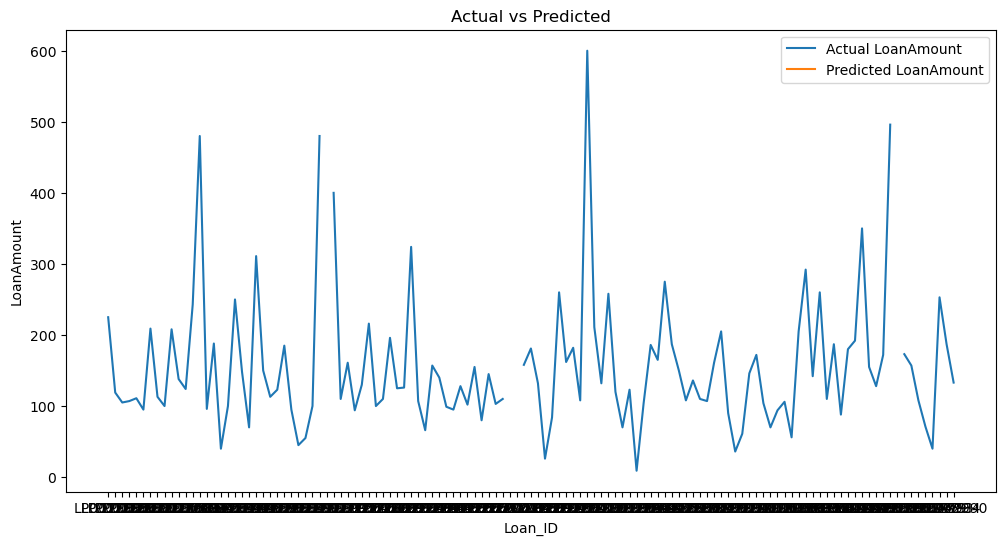

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test, label='Actual LoanAmount')
plt.plot(dates_test, predictions, label='Predicted LoanAmount')
plt.title('Actual vs Predicted')
plt.xlabel('Loan_ID')
plt.ylabel('LoanAmount')
plt.legend()
plt.show()